In [1]:
!pip install Xgboost

  Obtaining dependency information for Xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.1/99.8 MB 853.3 kB/s eta 0:01:57
   ---------------------------------------- 0.2/99.8 MB 807.1 kB/s eta 0:02:04
   ---------------------------------------- 0.2/99.8 MB 831.5 kB/s eta 0:02:00
   ---------------------------------------- 0.2/99.8 MB 838.1 kB/s eta 0:01:59
   ---------------------------------------- 0.3/99.8 MB 827.5 kB/s eta 0:02:01
   ---------------------------------------- 0.3/99.8 MB 770.1 kB/s eta 0:02:10
   -----------------

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
# Create Dataframe and Read the dataset using Pandas
dataset = pd.read_csv('meter1.csv')
dataset.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal


In [28]:
#Convert list into Dataframe
df = pd.DataFrame(dataset)
df

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,38.216539,3.586221,0.0,0,9.179851,19.4245,137.418074,85.963982,33.39880,18.055292,FullServiceRestaurant,Normal
8756,8756,38.199381,3.586221,0.0,0,9.179851,19.4245,130.424326,82.510920,33.39880,14.514605,FullServiceRestaurant,Normal
8757,8757,38.129123,3.586221,0.0,0,9.179851,19.4245,134.117636,90.431849,25.04910,18.636687,FullServiceRestaurant,Normal
8758,8758,38.017393,3.586221,0.0,0,9.179851,19.4245,125.885592,94.674521,16.69940,14.511671,FullServiceRestaurant,Normal


In [29]:
#Droping class feature 
df1 = df.drop(['0','Class'], axis=1)
df1

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),theft
0,22.035977,3.586221,0.0,0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,Normal
1,14.649757,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal
2,14.669567,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal
3,14.677808,0.000000,0.0,0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,Normal
4,14.824794,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8755,38.216539,3.586221,0.0,0,9.179851,19.4245,137.418074,85.963982,33.39880,18.055292,Normal
8756,38.199381,3.586221,0.0,0,9.179851,19.4245,130.424326,82.510920,33.39880,14.514605,Normal
8757,38.129123,3.586221,0.0,0,9.179851,19.4245,134.117636,90.431849,25.04910,18.636687,Normal
8758,38.017393,3.586221,0.0,0,9.179851,19.4245,125.885592,94.674521,16.69940,14.511671,Normal


In [30]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'df1' with a 'class_label' column
# Replace 'class_label' with the actual name of your class label column

theft = ["Normal", "Theft1","Theft2","Theft3","Theft4","Theft5","Theft6"]

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to your class labels
label_encoder.fit(theft)

# Transform the class labels in your DataFrame
df1['theft_encoded'] = label_encoder.transform(df1['theft'])


In [31]:
df1.theft_encoded.unique()

array([0, 5, 6, 2, 3, 4, 1])

In [32]:
df1

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),theft,theft_encoded
0,22.035977,3.586221,0.0,0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,Normal,0
1,14.649757,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,0
2,14.669567,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,0
3,14.677808,0.000000,0.0,0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,Normal,0
4,14.824794,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,38.216539,3.586221,0.0,0,9.179851,19.4245,137.418074,85.963982,33.39880,18.055292,Normal,0
8756,38.199381,3.586221,0.0,0,9.179851,19.4245,130.424326,82.510920,33.39880,14.514605,Normal,0
8757,38.129123,3.586221,0.0,0,9.179851,19.4245,134.117636,90.431849,25.04910,18.636687,Normal,0
8758,38.017393,3.586221,0.0,0,9.179851,19.4245,125.885592,94.674521,16.69940,14.511671,Normal,0


In [33]:
# Rename features
df1.columns = df1.columns.str.replace('[^a-zA-Z0-9]', '_')


In [34]:
df1

,Electricity_Facility__kW__Hourly_,Fans_Electricity__kW__Hourly_,Cooling_Electricity__kW__Hourly_,Heating_Electricity__kW__Hourly_,InteriorLights_Electricity__kW__Hourly_,InteriorEquipment_Electricity__kW__Hourly_,Gas_Facility__kW__Hourly_,Heating_Gas__kW__Hourly_,InteriorEquipment_Gas__kW__Hourly_,Water_Heater_WaterSystems_Gas__kW__Hourly_,theft,theft_encoded
0,22.035977,3.586221,0.0,0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,Normal,0
1,14.649757,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,0
2,14.669567,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,0
3,14.677808,0.000000,0.0,0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,Normal,0
4,14.824794,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,38.216539,3.586221,0.0,0,9.179851,19.4245,137.418074,85.963982,33.39880,18.055292,Normal,0
8756,38.199381,3.586221,0.0,0,9.179851,19.4245,130.424326,82.510920,33.39880,14.514605,Normal,0
8757,38.129123,3.586221,0.0,0,9.179851,19.4245,134.117636,90.431849,25.04910,18.636687,Normal,0
8758,38.017393,3.586221,0.0,0,9.179851,19.4245,125.885592,94.674521,16.69940,14.511671,Normal,0


In [35]:
## independent and dependent feature
X=df1.drop(labels=['theft','theft_encoded'],axis=1)
y=df1.theft_encoded

In [36]:
X.head()

,Electricity_Facility__kW__Hourly_,Fans_Electricity__kW__Hourly_,Cooling_Electricity__kW__Hourly_,Heating_Electricity__kW__Hourly_,InteriorLights_Electricity__kW__Hourly_,InteriorEquipment_Electricity__kW__Hourly_,Gas_Facility__kW__Hourly_,Heating_Gas__kW__Hourly_,InteriorEquipment_Gas__kW__Hourly_,Water_Heater_WaterSystems_Gas__kW__Hourly_
0,22.035977,3.586221,0.0,0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947
1,14.649757,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
2,14.669567,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
3,14.677808,0.000000,0.0,0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052
4,14.824794,0.000000,0.0,0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: theft_encoded, dtype: int32

In [38]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [39]:
#from sklearn.ensemble import RandomForestClassifier

In [40]:
#from sklearn.tree import DecisionTreeClassifier

In [41]:
import xgboost as xb

In [42]:
## Hypeparameter Tuning
#params={'max_depth':[3,5,10,None],
#              'n_estimators':[100,200,300],
#               'criterion':['gini','entropy']
#              }

In [43]:
#from sklearn.model_selection import RandomizedSearchCV

In [44]:
#classfier=RandomForestClassifier()
#Try to implement via adaboost and gradient boost algo also
classifier=xb.XGBClassifier()

In [45]:
#cv=RandomizedSearchCV(classfier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
#cv.fit(X_train,y_train)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
#cv.best_params_

In [47]:
## prediction
#y_pred=cv.predict(X_test)
y_pred=classifier.predict(X_test)
#print(confusion_matrix(y_test,y_pred3))
#print(accuracy_score(y_test,y_pred3))
#print(classification_report(y_test,y_pred3))

In [48]:
from sklearn.metrics import accuracy_score,classification_report

In [49]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.87305430646835
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1724
           1       0.73      0.73      0.73       285
           2       1.00      0.98      0.99       133
           3       0.73      0.72      0.73       219
           4       0.91      0.87      0.89       223
           5       0.94      0.94      0.94       196
           6       0.05      0.08      0.06       111

    accuracy                           0.87      2891
   macro avg       0.76      0.75      0.76      2891
weighted avg       0.90      0.87      0.89      2891



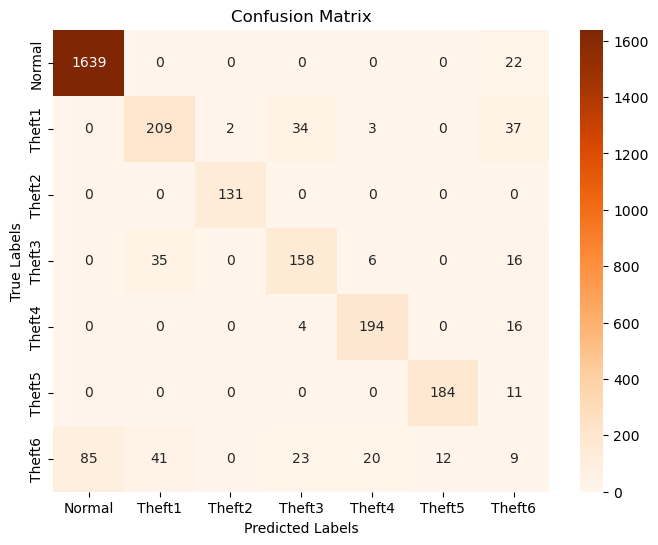

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are lists or arrays
# You can convert them to a DataFrame or Series for easier manipulation

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)

# Assuming df['target'] and df['pred'] are categorical variables with encoded categories 'normal', 'theft1', ..., 'theft6'

# Convert the categories to integer codes
#df['target_num'] = df['target'].cat.codes
#df['pred_num'] = df['pred'].cat.codes

# Use these integer codes to create the confusion matrix
cm = confusion_matrix(y_test_df['theft_encoded'], y_pred_df[0])

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Normal", "Theft1", "Theft2", "Theft3", "Theft4", "Theft5", "Theft6"],
            yticklabels=["Normal", "Theft1", "Theft2", "Theft3", "Theft4", "Theft5", "Theft6"])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [51]:
y_test

6056    0
5556    0
5990    0
7674    1
3319    5
       ..
6504    0
7210    0
4690    0
7274    0
1170    1
Name: theft_encoded, Length: 2891, dtype: int32

In [52]:
y_pred_df

,0
0,0
1,0
2,0
3,6
4,5
...,...
2886,0
2887,0
2888,0
2889,0
